<a href="https://colab.research.google.com/github/mofanchang/CNN-model/blob/main/Cervical_cancer_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What problem we want to solve:
The hospital routin work of cytopythologist 
neeed to screening 100 cervical slide 
which that the work have the understable the 
efffect with the physical 
and mental.


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/cytoclassifier/train'

In [ ]:
import numpy as np 
import pandas as pd 
import os 
print(os.listdir("/content/drive/MyDrive/Colab Notebooks/cytoclassifier/train"))

['HSIL', 'LSIL', 'normal']


In [ ]:
dir = '/content/drive/MyDrive/Colab Notebooks/cytoclassifier/train/' 
normal_dir = dir+'HSIL' 
HSIL_dir = dir+'LSIL' 
LSIL_dir = dir+'normal' 

In [ ]:
import cv2 
X = []
y_label = []
imgsize = 150
# 定義一個函數讀入細胞圖片
def training_data(label,data_dir):
    print ("loading：", data_dir)
    for img in os.listdir(data_dir):
        path = os.path.join(data_dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(imgsize,imgsize))
        X.append(np.array(img))
        y_label.append(str(label)) 
# 讀入3个dictionary中的細胞圖片
training_data('HSIL',HSIL_dir)
training_data('LSIL',LSIL_dir)
training_data('normal',normal_dir)

loading： /content/drive/MyDrive/Colab Notebooks/cytoclassifier/train/LSIL
loading： /content/drive/MyDrive/Colab Notebooks/cytoclassifier/train/normal
loading： /content/drive/MyDrive/Colab Notebooks/cytoclassifier/train/HSIL


In [ ]:
from sklearn.preprocessing import LabelEncoder 
from keras.utils.np_utils import to_categorical 
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_label) # label encoding
y = to_categorical(y,3) # label transfer to One-hot encoding
X = np.array(X) # Convert X from a list to an array of tensors
X = X/255 # X array normalize

In [ ]:
print ('The shape of the X tensor：', X.shape)
print ('The first data of the X tensor：', X[1])

X张量的形状： (1858, 150, 150, 3)
X张量的第一个数据： [[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


In [ ]:
print ('The shape of the y tensor：', y.shape)
print ('The first data of the y tensor：', y[1])

y张量的形状： (1858, 3)
y张量的第一个数据： [1. 0. 0.]


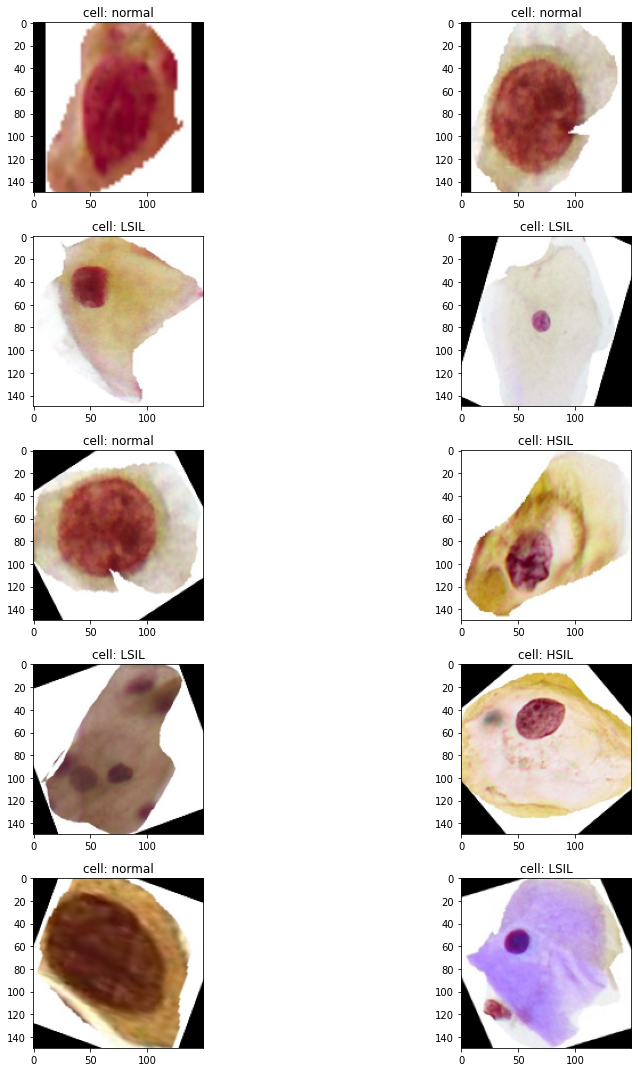

In [ ]:
import matplotlib.pyplot as plt 
import random as rdm 
# 隨機顯示幾張細胞圖片
fig,ax = plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        r = rdm.randint(0,len(X))
        ax[i,j].imshow(X[r])
        ax[i,j].set_title('cell: '+y_label[r])
plt.tight_layout()

In [ ]:
from sklearn.model_selection import train_test_split # 导入拆分工具
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 random_state=0)

In [ ]:
from keras import layers 
from keras import models 
cnn = models.Sequential() 
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', # 卷積層
                        input_shape=(150, 150, 3))) 
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化層
cnn.add(layers.Conv2D(64, (3, 3), activation='relu')) # 卷積層
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化層
cnn.add(layers.Conv2D(128, (3, 3), activation='relu')) # 卷積層
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化層
cnn.add(layers.Conv2D(128, (3, 3), activation='relu')) # 卷積層
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化層
cnn.add(layers.Flatten()) # 展平層
cnn.add(layers.Dense(512, activation='relu')) # 全連接層
cnn.add(layers.Dense(3, activation='softmax')) # 分類輸出
cnn.compile(loss='categorical_crossentropy', # 損失函數
            optimizer='RMSprop', # 優化器
            metrics=['acc']) # Accurancy

In [ ]:
history = cnn.fit(X_train,y_train, 
                    epochs=20,     
                    batch_size=50, 
                    validation_data=(X_test,y_test)) 

Epoch 1/20
30/30 [==============================] - 2s 58ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.5075 - val_acc: 0.9435
Epoch 2/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1718 - acc: 0.9610 - val_loss: 0.2386 - val_acc: 0.9758
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 2.8860e-04 - acc: 1.0000 - val_loss: 0.2769 - val_acc: 0.9758
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 9.6346e-05 - acc: 1.0000 - val_loss: 0.3222 - val_acc: 0.9731
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2216 - acc: 0.9603 - val_loss: 0.2821 - val_acc: 0.9704
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0778 - acc: 0.9805 - val_loss: 0.3154 - val_acc: 0.9086
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0451 - acc: 0.9886 - val_loss: 0.3231 - val_acc: 0.9194
Epoch 8/20
30/30 [==============================] - 1s 41ms/step - loss: 0.

In [ ]:
scores = cnn.evaluate(X_train,y_train)
print("Accuracy: ", scores[1])

47/47 [==============================] - 1s 14ms/step - loss: 4.6098e-05 - acc: 1.0000
Accuracy:  1.0


In [ ]:
import matplotlib.pyplot as plt

# show images and the correctness of predictions in a table
def display_predictions(images, labels, predictions, num = 10):
    plt.gcf().set_size_inches(15, 15)
    for i in range(0, num):
        ax = plt.subplot(3, 5, i + 1)
        ax.imshow(images[i])
    
    title = "prediction = " + str(predictions[i])
    title += "\nlabel = " + str(labels[i])
      
    ax.set_title(title, fontsize = 12)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

In [ ]:
model=cnn.save('/content/drive/MyDrive/Colab Notebooks/cytoclassifier/model0212')

In [ ]:
import tensorflow as tf

# # Build and compile the model
# model = ... # your CNN model


# Save the model to disk
cnn.save('/content/drive/MyDrive/Colab Notebooks/cytoclassifier/model0212.h5')

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

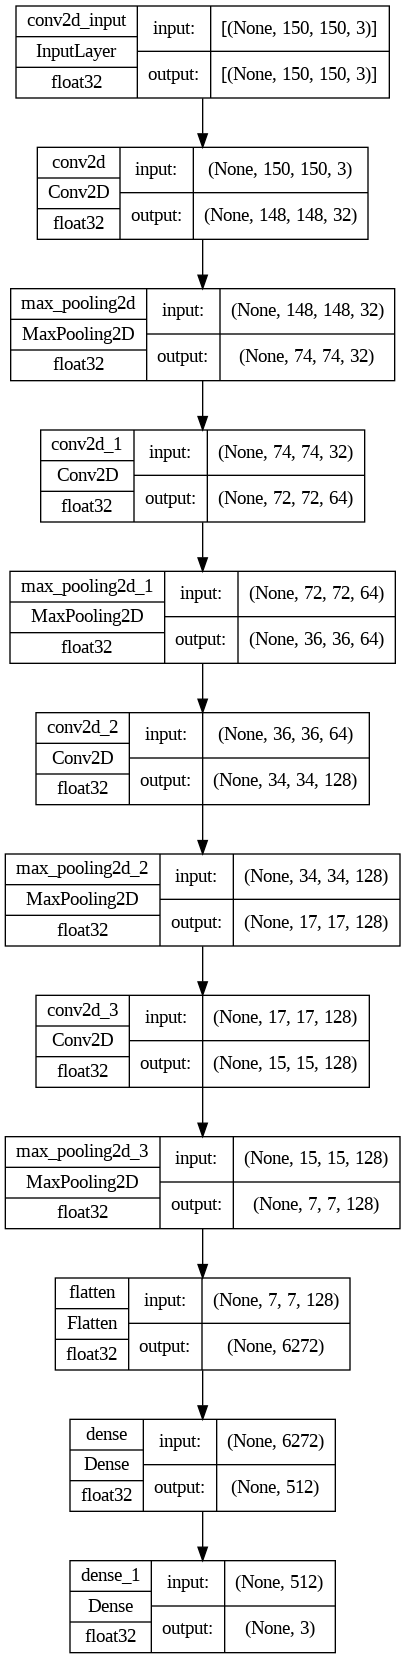

In [ ]:
tf.keras.utils.plot_model(cnn,show_shapes=True,show_dtype=True,to_file='/content/drive/MyDrive/Colab Notebooks/cytoclassifier/model.png')

存模型

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/cytoclassifier/model.h5")

測試模型準確性

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [ ]:
pre_model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/cytoclassifier/model0212.h5")
 
dir = '/content/drive/MyDrive/Colab Notebooks/cytoclassifier/HSIL/HSIL-61.jpg'

 
img = keras.preprocessing.image.load_img(
    dir, target_size=(150, 150)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch
 
predictions = pre_model.predict(img_array)
score = tf.nn.softmax(tf.constant(predictions[0]))
print(score)
print(predictions)

1/1 [==============================] - 0s 89ms/step
tf.Tensor([0.21194157 0.57611686 0.21194157], shape=(3,), dtype=float32)
[[0. 1. 0.]]


In [ ]:
classes = ['LSIL', 'HSIL', 'normal']
class_index = tf.argmax(score)
class_name = classes[class_index.numpy()]
print("Class index:", class_index.numpy(), "Class name:", class_name)

Class index: 1 Class name: HSIL


In [ ]:
score = tf.nn.softmax(predictions[0])
print(score)

tf.Tensor([0.21194157 0.57611686 0.21194157], shape=(3,), dtype=float32)
